# Ridge and Lasso Regression

In this notebook, we will explore Ridge and Lasso regression techniques, both theoretically and practically. We will use synthetic data to demonstrate how these methods work and how they can be used to prevent overfitting and perform feature selection.

## Importing Libraries

First, we need to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

## Generating Synthetic Data

Let's generate some synthetic data for our demonstration. We will create a dataset with 100 samples and 10 features. We will also define the true coefficients for these features.


In [2]:
np.random.seed(42)
X = np.random.rand(100, 10)
true_coefs = np.array([1.5, -2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0])
y = X.dot(true_coefs) + np.random.normal(0, 0.5, size=100)

## Splitting the Data

Next, we split the data into training and testing sets to evaluate our models.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ridge Regression

Ridge regression adds an L2 penalty to the ordinary least squares objective function. Let's fit a Ridge regression model and evaluate its performance.


In [4]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

## Lasso Regression

Lasso regression adds an L1 penalty to the ordinary least squares objective function. Let's fit a Lasso regression model and evaluate its performance.

In [5]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

## Results and Comparison

Finally, we compare the coefficients estimated by Ridge and Lasso regression with the true coefficients and also look at the mean squared errors of both models.

In [6]:
print("Ridge Coefficients:", ridge.coef_)
print("Ridge MSE:", ridge_mse)
print("Lasso Coefficients:", lasso.coef_)
print("Lasso MSE:", lasso_mse)

Ridge Coefficients: [ 1.44129659e+00 -1.67929518e+00  2.33484600e+00 -1.32566302e-01
 -1.12103967e-03 -2.58606778e-03 -5.10637809e-02  2.69986500e-01
 -5.60430721e-02  1.00376571e-01]
Ridge MSE: 0.14618080060508137
Lasso Coefficients: [ 0.5976384  -0.55999677  1.21949322 -0.         -0.         -0.
  0.          0.         -0.         -0.        ]
Lasso MSE: 0.5577252441742971


## Plotting the Coefficients

We can visually compare the true coefficients with those estimated by Ridge and Lasso regression.

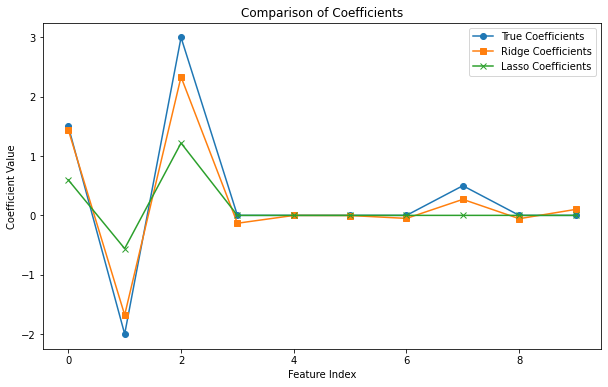

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(true_coefs, 'o-', label='True Coefficients')
plt.plot(ridge.coef_, 's-', label='Ridge Coefficients')
plt.plot(lasso.coef_, 'x-', label='Lasso Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients')
plt.legend()
plt.show()

# Summary

In this notebook, we explored two important regularization techniques in linear regression: Ridge and Lasso regression.

1. **Ridge Regression (L2 Regularization)**:
   - Adds a penalty equal to the sum of the squared coefficients.
   - Helps to prevent overfitting by shrinking the coefficients.
   - Suitable when all predictors are believed to be relevant but possibly correlated.

2. **Lasso Regression (L1 Regularization)**:
   - Adds a penalty equal to the sum of the absolute values of the coefficients.
   - Not only helps to prevent overfitting but also performs feature selection by shrinking some coefficients to exactly zero.
   - Useful when we suspect that only a subset of the predictors are relevant.

### Practical Insights
- Both Ridge and Lasso regression help to address multicollinearity and overfitting issues in linear regression models.
- Ridge regression tends to distribute the penalty across all coefficients, whereas Lasso regression can zero out some coefficients, thus performing variable selection.
- The choice between Ridge and Lasso (or a combination like Elastic Net) depends on the specific context and the characteristics of the data.

### Model Evaluation
- We evaluated both models using Mean Squared Error (MSE) on a test set.
- The comparison of coefficients with the true coefficients showed how each method adjusts the parameter estimates.

These techniques are powerful tools for creating more robust and interpretable linear models, especially when dealing with high-dimensional data.

By understanding and applying Ridge and Lasso regression, you can improve the performance and generalizability of your predictive models.